## PREDICTIONS ON TEST DATA

In [53]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from datetime import datetime
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score,
    precision_score, recall_score, roc_auc_score, make_scorer,
)

from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

# Import custom functions
from my_functions import (
    load_data,
    evaluate_classification_model,
    plot_roc_pr_curves,
    calculating_marketing_campaighn,
)

print("Libraries imported successfully!")
print(f"Predictions at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries imported successfully!
Predictions at: 2025-06-26 07:32:25


In [12]:
# Load saved data
model, feature_names, threshold = load_data('CatBoostClassifier_26062025_07_17.pickle')

In [14]:
# Load test data
test = load_data('data/churn_test_model_fe.pickle')
print("Test data structure:")
print(f"Dataset shape: {test.shape}")

Test data structure:
Dataset shape: (150000, 817)


In [28]:
# Do the same transformation as with train data
y = test['target']
X = test[feature_names].fillna(-1)
# Predict
pred_proba = model.predict_proba(X)[:, 1]
pred_binary = (predictions_proba >= threshold).astype(int)
pred_binary

array([0, 0, 0, ..., 0, 0, 1])

In [30]:
# Evaluate
results_df = evaluate_classification_model(
    y_true=y, 
    y_pred_binary=pred_binary, 
    y_pred_proba=predictions_proba, 
    model_name='catboost'
)
results_df

,Model,AUC-ROC,Recall,F1,Precision
0,catboost,0.880256,0.521217,0.49239,0.466584


Generating confusion matrix...


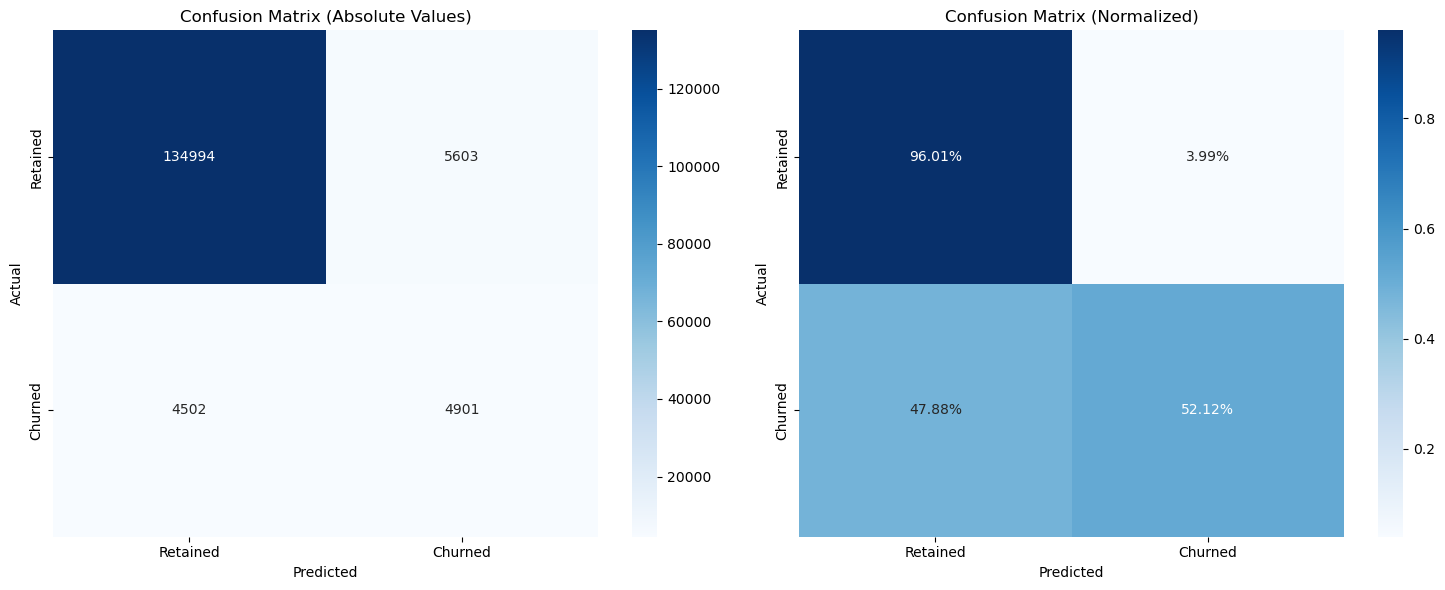


Business Impact Analysis:

True Negatives (Correctly identified retained): 134,994
False Positives (Incorrectly flagged as churn): 5,603
False Negatives (Missed churners): 4,502
True Positives (Correctly identified churn): 4,901
Confusion matrix analysis completed!


In [32]:
plotting_confusion_matrix(y, pred_binary)

In [36]:
print('Model Evaluation')
print(classification_report(y, pred_binary))

Model Evaluation
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96    140597
         1.0       0.47      0.52      0.49      9403

    accuracy                           0.93    150000
   macro avg       0.72      0.74      0.73    150000
weighted avg       0.94      0.93      0.93    150000



# Business Recommendations and ROI Analysis

In [46]:
#Calculating business impact and ROI potential for multiple retention scenarios.
roi_df = calculating_marketing_campaighn(y, predictions_binary, avg_customer_value = 50, campaign_cost_per_customer = 20)


Calculating business impact and ROI potential for multiple retention scenarios...

Business Impact Analysis (Retention Scenarios):
Total customers in test set: 150,000
Actual churners: 9,403.0 (6.3%)
Predicted churners: 10,504 (7.0%)
Correctly identified churners: 4,901

Retention Rate (%)  Potential Savings ($)  Campaign Cost ($)  Net ROI ($)    ROI (%)
                3%                88218.0             210080    -121862.0 -58.007426
                5%               147030.0             210080     -63050.0 -30.012376
                6%               176436.0             210080     -33644.0 -16.014851
                7%               205842.0             210080      -4238.0  -2.017327
               10%               294060.0             210080      83980.0  39.975248
               15%               441090.0             210080     231010.0 109.962871
               20%               588120.0             210080     378040.0 179.950495
               25%               735150.0       

## Summary and Key Findings

### Model Performance on unseen data
- **ROC AUC: 0.88** - Excellent discrimination ability due to hard unbalanced data
- **F1 Score: 0.49** - Good balance between precision and recall
- **Optimal Threshold: 0.81** - Maximizes business value

### Churn Prevention: The Precision-Recall Trade-Off

When deploying a churn prediction model, there is always a fundamental trade-off between campain costs and over-targeting:

- But ! the cost of losing a customer is high relative to the cost of a retention offer, it may be better to maximize recall, even if that means higher campaign costs.

- If budget constraints are critical, you may prefer to maximize precision and accept some churn.
